In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb
import xgboost as xgb
import numpy as np


In [ ]:
pd.options.display.max_rows = 380
df = pd.read_csv("train.csv")

In [ ]:
df.shape

(76020, 371)

In [ ]:
df = df[df['var3']>-999999]
df.shape

(75904, 371)

In [ ]:
# todas as 370 colunas não tem valores nulos
pd.DataFrame(data=df.isnull().sum()).reset_index()[0].value_counts()

0    370
Name: 0, dtype: int64

In [ ]:
# tipos de todas as colunas
# todas as variáveis são nunméricas, int ou float, não sendo necessário nenhum encode
df.dtypes

var3                               int64
var15                              int64
imp_ent_var16_ult1               float64
imp_op_var39_comer_ult1          float64
imp_op_var39_comer_ult3          float64
imp_op_var40_comer_ult1          float64
imp_op_var40_comer_ult3          float64
imp_op_var40_efect_ult1          float64
imp_op_var40_efect_ult3          float64
imp_op_var40_ult1                float64
imp_op_var41_comer_ult1          float64
imp_op_var41_comer_ult3          float64
imp_op_var41_efect_ult1          float64
imp_op_var41_efect_ult3          float64
imp_op_var41_ult1                float64
imp_op_var39_efect_ult1          float64
imp_op_var39_efect_ult3          float64
imp_op_var39_ult1                float64
imp_sal_var16_ult1               float64
ind_var1_0                         int64
ind_var1                           int64
ind_var2_0                         int64
ind_var2                           int64
ind_var5_0                         int64
ind_var5        

In [ ]:
# eliminando linhas duplicadas
df = df.drop_duplicates()

In [ ]:
df.shape

(75904, 371)

#### Remoção de features constantes

In [ ]:
vars_constantes = df.nunique().sort_values()
vars_constantes = vars_constantes[vars_constantes == 1]


ind_var41                        1
num_var46                        1
imp_amort_var18_hace3            1
num_var28_0                      1
num_var28                        1
num_var27                        1
ind_var27                        1
ind_var28                        1
ind_var28_0                      1
ind_var2                         1
ind_var27_0                      1
saldo_var41                      1
num_reemb_var13_hace3            1
num_var41                        1
num_reemb_var33_hace3            1
saldo_var27                      1
saldo_var28                      1
num_trasp_var17_out_hace3        1
num_var46_0                      1
saldo_var46                      1
ind_var2_0                       1
imp_amort_var34_hace3            1
num_var27_0                      1
ind_var46_0                      1
num_var2_ult1                    1
num_var2_0_ult1                  1
ind_var46                        1
imp_reemb_var13_hace3            1
num_trasp_var33_out_

In [ ]:
df = df.drop(vars_constantes.index, axis = 1)
df.shape

(75904, 337)

Remoção de features perfeitamente correlacionadas

In [ ]:
# Criando uma matriz de correlação.

corr = df.drop('TARGET', axis = 1).corr().abs()

# Selecionando o triângulo superior, da matriz de correlação.

upper = corr.where(np.triu(np.ones(corr.shape), k = 1).astype(bool))

# Encontrando os índices das variáveis perfeitamente correlacionadas (correlação igual a 1).

to_drop = [column for column in upper.columns if any(upper[column] == 1)]

In [ ]:
pd.DataFrame(to_drop, columns = ['PerfectlyCorrelated'])

,PerfectlyCorrelated
0,ind_var13_medio
1,ind_var18
2,ind_var26
3,ind_var25
4,ind_var29_0
5,ind_var29
6,ind_var32
7,ind_var34
8,ind_var37
9,ind_var39


In [ ]:
df = df.drop(df[to_drop], axis = 1)

Remoção de features quasi constantes

In [ ]:
selector = VarianceThreshold(threshold=0.01)
selector.fit(df.drop(labels = ["TARGET"], axis =1 ))

VarianceThreshold(threshold=0.01)

In [ ]:
# a soma do suporte retorna o número de features que não tem variância constante
sum(selector.get_support())

255

In [ ]:
features_constantes = df.drop(labels = ['TARGET'], axis = 1).columns[selector.get_support()]

In [ ]:
pd.DataFrame(features_constantes, columns = ['constantFeatures']).shape

(255, 1)

In [ ]:
quasiConstantFeatures = [f for f in df.drop(labels = ['TARGET'], axis = 1).columns if f not in features_constantes]

In [ ]:
df = df.drop(quasiConstantFeatures, axis = 1)

#### Modelo com todas as features exceto as constantes

In [ ]:
...
from collections import Counter
# conta exemplos de cada classe
counter = Counter(df["TARGET"])
# estimate scale_pos_weight value
estimate = (counter[0] / counter[1])
print('Estimate: %.3f' % estimate)

Estimate: 24.251


In [ ]:
df["TARGET"].value_counts()

0    72898
1     3006
Name: TARGET, dtype: int64

In [ ]:
 X = df.drop(columns="TARGET")
 y = df["TARGET"]

In [ ]:
# validação cruzada para teste do desempenho geral dos modelos com parametros acusando dataset desbalanceado e auc como métrica

models = [
    ('Random Forest', RandomForestClassifier(class_weight="balanced")),
    ('LightGBM', LGBMClassifier(scale_pos_weight=estimate)),
    ('XGBoost', xgb.XGBClassifier(scale_pos_weight=estimate))
]

# Validação cruzada
for model_name, model in models:
    scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')  # 5-fold cross-validation
    print(f'{model_name}:')
    print(f'Scores: {scores}')
    print(f'Mean score: {scores.mean()}')
    print('---')

Random Forest:
Scores: [0.77260413 0.75655617 0.75533735 0.79079618 0.70117111]
Mean score: 0.7552929880216526
---
LightGBM:
Scores: [0.81525373 0.81209855 0.82453775 0.8265337  0.81828044]
Mean score: 0.8193408333713407
---
XGBoost:
Scores: [0.791576   0.71528905 0.7916613  0.79577791 0.78497403]
Mean score: 0.7758556586242878
---


Melhor modelo com parametros default: lightGBM, a partir da próxima seção:
- feature selection - o dataset conta com mais de 200 features, podemos eliminar algumas?
- feature enginering - fazer algumas features sintéticas
- grid search - tunar os hiperparametros do modelo

#### Feature selection

In [ ]:
# correlação de pearson
num_feats = 200
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calcula a correlação para cada feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN com 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # nome da feature
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 para não e 1 para sim
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, y, num_feats)

In [ ]:
# método de chi quadrado
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
# lista de variáveis selecionadas
chi_feature = X.loc[:,chi_support].columns.tolist()

In [ ]:
# Eliminacão recursiva usando uma regressão logistica
rfe_selector = RFE(estimator=LogisticRegression(max_iter = 1000), n_features_to_select=num_feats, step=10, verbose=5)
rfe_selector.fit(X_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()

Fitting estimator with 255 features.
Fitting estimator with 245 features.
Fitting estimator with 235 features.
Fitting estimator with 225 features.
Fitting estimator with 215 features.
Fitting estimator with 205 features.


In [ ]:
# Método embeedded - métodos que usam algoritmos com função de feature selection bult-in
# random forest

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=num_feats)
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()

In [ ]:
# light gbm
from lightgbm import LGBMClassifier
lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=num_feats)
embeded_lgb_selector.fit(X, y)

embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()

In [ ]:
print(len(cor_support))
print(len(chi_support))
print(len(rfe_support))
print(len(embeded_rf_support))
print(len(embeded_lgb_support))

255
255
255
255
255


In [ ]:
# concatenando todas as seleções
feature_selection_df = pd.DataFrame({'Feature':X.columns.tolist(), 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support,
                                    'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support})
# quantos métodos a consideraram importante
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# ajustando data frame de visualização
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(num_feats)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return reduction(axis=axis, out=out, **passkwargs)


,Feature,Pearson,Chi-2,RFE,Random Forest,LightGBM,Total
1,var38,True,True,True,True,True,5
2,var15,True,True,True,True,True,5
3,saldo_var5,True,True,True,True,True,5
4,saldo_var42,True,True,True,True,True,5
5,saldo_var30,True,True,True,True,True,5
6,saldo_medio_var5_ult3,True,True,True,True,True,5
7,saldo_medio_var5_ult1,True,True,True,True,True,5
8,saldo_medio_var5_hace3,True,True,True,True,True,5
9,saldo_medio_var5_hace2,True,True,True,True,True,5
10,num_var45_ult1,True,True,True,True,True,5


Podemos avaliar as features que tem maioria entre os critérios, ou seja, que pelo menos 3 critérios a classificam como importante

In [ ]:
features_to_keep = feature_selection_df[feature_selection_df["Total"] >= 3]["Feature"].tolist()
len(features_to_keep)

178

In [ ]:
X_selected = X[features_to_keep]

In [ ]:
X_selected.shape

(75904, 178)

In [ ]:
models = [
    ('Random Forest', RandomForestClassifier(class_weight="balanced")),
    ('LightGBM', LGBMClassifier(scale_pos_weight=estimate)),
    ('XGBoost', xgb.XGBClassifier(scale_pos_weight=estimate))
]

# Validação cruzada
for model_name, model in models:
    scores = cross_val_score(model, X_selected, y, cv=5, scoring='roc_auc')  # 5-fold cross-validation
    print(f'{model_name}:')
    print(f'Scores: {scores}')
    print(f'Mean score: {scores.mean()}')
    print('---')

Random Forest:
Scores: [0.7594168  0.76191253 0.76384621 0.79244426 0.70361502]
Mean score: 0.7562469634918964
---
LightGBM:
Scores: [0.81780355 0.80851553 0.832253   0.8273249  0.81273734]
Mean score: 0.8197268637237091
---
XGBoost:
Scores: [0.77523897 0.7367777  0.80344756 0.74415887 0.76776964]
Mean score: 0.7654785480268483
---


A métrica dos dois melhores modelos melhoram modestamente mesmo com menos features, reduzindo a complexidade do modelo com ganho de informação

#### Treinamento do modelo

In [ ]:
X_selected_values = X_selected.values
y_values = y.values

In [ ]:
# definindo variável resposta e features


(75904,)
(75904, 178)


In [ ]:
from hyperopt import hp
from hyperopt import Trials, tpe, fmin

search_space = {
    'n_estimators':100,
    'num_leaves':hp.quniform('num_leaves',32,64,1),
    'max_depth':hp.quniform('max_depth',100,160,1),
    'learning_rate':hp.uniform('learning_rate',0.01,0.2),
    'min_child_samples':hp.quniform('min_child_samples',60,100,1),
    'subsample':hp.uniform('subsample', 0.7,1)
}

In [ ]:
# exemplo de kfolds estratificados
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

for i, (train_index, test_index) in enumerate(skf.split(X_selected_values, y_values)):
  print(f"Fold {i}:")
  print(f"  Train: index={train_index}")
  print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[14860 14861 14917 ... 75901 75902 75903]
  Test:  index=[    0     1     2 ... 15187 15188 15189]
Fold 1:
  Train: index=[    0     1     2 ... 75901 75902 75903]
  Test:  index=[14860 14861 14917 ... 30381 30382 30383]
Fold 2:
  Train: index=[    0     1     2 ... 75901 75902 75903]
  Test:  index=[29670 29701 29724 ... 46413 46445 46453]
Fold 3:
  Train: index=[    0     1     2 ... 75901 75902 75903]
  Test:  index=[45501 45502 45503 ... 62005 62037 62044]
Fold 4:
  Train: index=[    0     1     2 ... 62005 62037 62044]
  Test:  index=[60663 60664 60665 ... 75901 75902 75903]


In [ ]:
from sklearn.metrics import roc_auc_score
def objective_function(search_space):
    lgbm_clf = LGBMClassifier(
        n_estimators=int(search_space['n_estimators']),
        max_depth=int(search_space['max_depth']),
        learning_rate=search_space['learning_rate'],
        num_leaves=int(search_space['num_leaves']),
        min_child_samples=int(search_space['min_child_samples']),
        subsample=search_space['subsample']
    )


    kfold = StratifiedKFold(n_splits=5)
    roc_auc_list=[]

    for train_index, test_index in kfold.split(X_selected_values,y_values):
        X_train, X_test = X_selected_values[train_index], X_selected_values[test_index]
        y_train, y_test = y_values[train_index], y_values[test_index]

        lgbm_clf.fit(X_train, y_train, eval_set=[(X_train, y_train),(X_test, y_test)], eval_metric='auc',callbacks=[lgb.early_stopping(30)])
        y_pred = lgbm_clf.predict(X_test)

        score = roc_auc_score(y_test, y_pred)
        roc_auc_list.append(score)

    return -1*np.mean(roc_auc_list)

In [ ]:
trial_val = Trials()

best= fmin(fn=objective_function,
              space=search_space,
                algo=tpe.suggest,
                max_evals=50,
                trials=trial_val,
                rstate=np.random.default_rng(seed=9))



best

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[13]	training's auc: 0.886702	training's binary_logloss: 0.123118	valid_1's auc: 0.827381	valid_1's binary_logloss: 0.13834
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[17]	training's auc: 0.900114	training's binary_logloss: 0.118648	valid_1's auc: 0.827	valid_1's binary_logloss: 0.138065
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[15]	training's auc: 0.890164	training's binary_logloss: 0.121185	valid_1's auc: 0.837319	valid_1's binary_logloss: 0.137006
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[17]	training's auc: 0.894339	training's binary_logloss: 0.120351	valid_1's auc: 0.848275	valid_1's binary_logloss: 0.132884
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[2]	training's auc: 0.84

{'learning_rate': 0.1924708201688647,
 'max_depth': 102.0,
 'min_child_samples': 77.0,
 'num_leaves': 39.0,
 'subsample': 0.86697498399033}

#### Modelagem

In [ ]:
print(X_selected.drop(columns="ID").shape)
print(y.shape)

(75904, 177)
(75904,)


In [ ]:
# o argumento "stratify" garante que no treino e no test a proporção de exemplos de cada calsse será a mesmo do dataset original
X_train, X_test, y_train, y_test = train_test_split(X_selected.drop(columns="ID"), y, test_size=0.20, random_state=42, stratify=y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60723, 177)
(60723,)
(15181, 177)
(15181,)


In [ ]:
lgbm_clf = LGBMClassifier(n_estimators=500,
                          learning_rate=best['learning_rate'],
                          max_depth=int(best['max_depth']),
                          min_child_samples=int(best['min_child_samples']),
                          num_leaves=int(best['num_leaves']),
                          subsample=best['subsample'])
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc',eval_set=[(X_train, y_train),(X_test, y_test)])

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	training's auc: 0.831103	training's binary_logloss: 0.150329	valid_1's auc: 0.810365	valid_1's binary_logloss: 0.152574
[2]	training's auc: 0.842077	training's binary_logloss: 0.143859	valid_1's auc: 0.819365	valid_1's binary_logloss: 0.147448
[3]	training's auc: 0.848969	training's binary_logloss: 0.139569	valid_1's auc: 0.82463	valid_1's binary_logloss: 0.144342
[4]	training's auc: 0.85381	training's binary_logloss: 0.136516	valid_1's auc: 0.828475	valid_1's binary_logloss: 0.142112
[5]	training's auc: 0.856786	training's binary_logloss: 0.13423	valid_1's auc: 0.83232	valid_1's binary_logloss: 0.140304
[6]	training's auc: 0.860159	training's binary_logloss: 0.132292	valid_1's auc: 0.834044	valid_1's binary_logloss: 0.139019
[7]	training's auc: 0.863018	training's binary_logloss: 0.130741	valid_1's auc: 0.835481	valid_1's binary_logloss: 0.13816
[8]	training's auc: 0.865746	training's binary_logloss: 0.129473	valid_1's auc: 0.834606	valid_1's binary_logloss: 0.13769
[9]	training's

LGBMClassifier(learning_rate=0.1924708201688647, max_depth=102,
               min_child_samples=77, n_estimators=500, num_leaves=39,
               subsample=0.86697498399033)

In [ ]:
y_pred_prob = lgbm_clf.predict_proba(X_test)[:,1]

In [ ]:
roc_auc_score(y_test, y_pred_prob)

0.8380578551066011

#### Predição nos dados de teste do kaggle

In [ ]:
teste = pd.read_csv("test.csv")

In [ ]:
teste.shape

(75818, 370)

In [ ]:
testID = teste["ID"]

In [ ]:
teste.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [ ]:
# selecionar váriaveis do treino
teste = teste[X_selected.columns]

In [ ]:
teste.shape

(75818, 178)

In [ ]:
teste.head()

,var38,var15,saldo_var5,saldo_var42,saldo_var30,saldo_medio_var5_ult3,saldo_medio_var5_ult1,saldo_medio_var5_hace3,saldo_medio_var5_hace2,num_var45_ult1,...,delta_num_venta_var44_1y3,delta_num_compra_var44_1y3,delta_num_aport_var17_1y3,delta_num_aport_var13_1y3,delta_imp_venta_var44_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_reemb_var13_1y3,delta_imp_compra_var44_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var13_1y3
0,40532.10,32,6.0,6.0,6.0,4.80,6.00,2.43,6.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0
1,45486.72,35,3.0,3.0,3.0,2.85,3.00,2.55,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0
2,46993.95,23,30.0,30.0,30.0,66.15,51.45,57.00,90.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0
3,187898.61,24,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0
4,73649.73,23,30.0,30.0,30.0,21.30,30.00,3.87,30.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0


In [ ]:
lgbm_clf.predict_proba(teste)[:,1]

array([0.02622454, 0.04289802, 0.00421241, ..., 0.00630867, 0.06300402,
       0.00421241])

In [ ]:
pd.DataFrame({
    'ID'    : testID,
    'TARGET': lgbm_clf.predict_proba(teste)[:,1]
}).to_csv('predLGBM.csv', index = False)

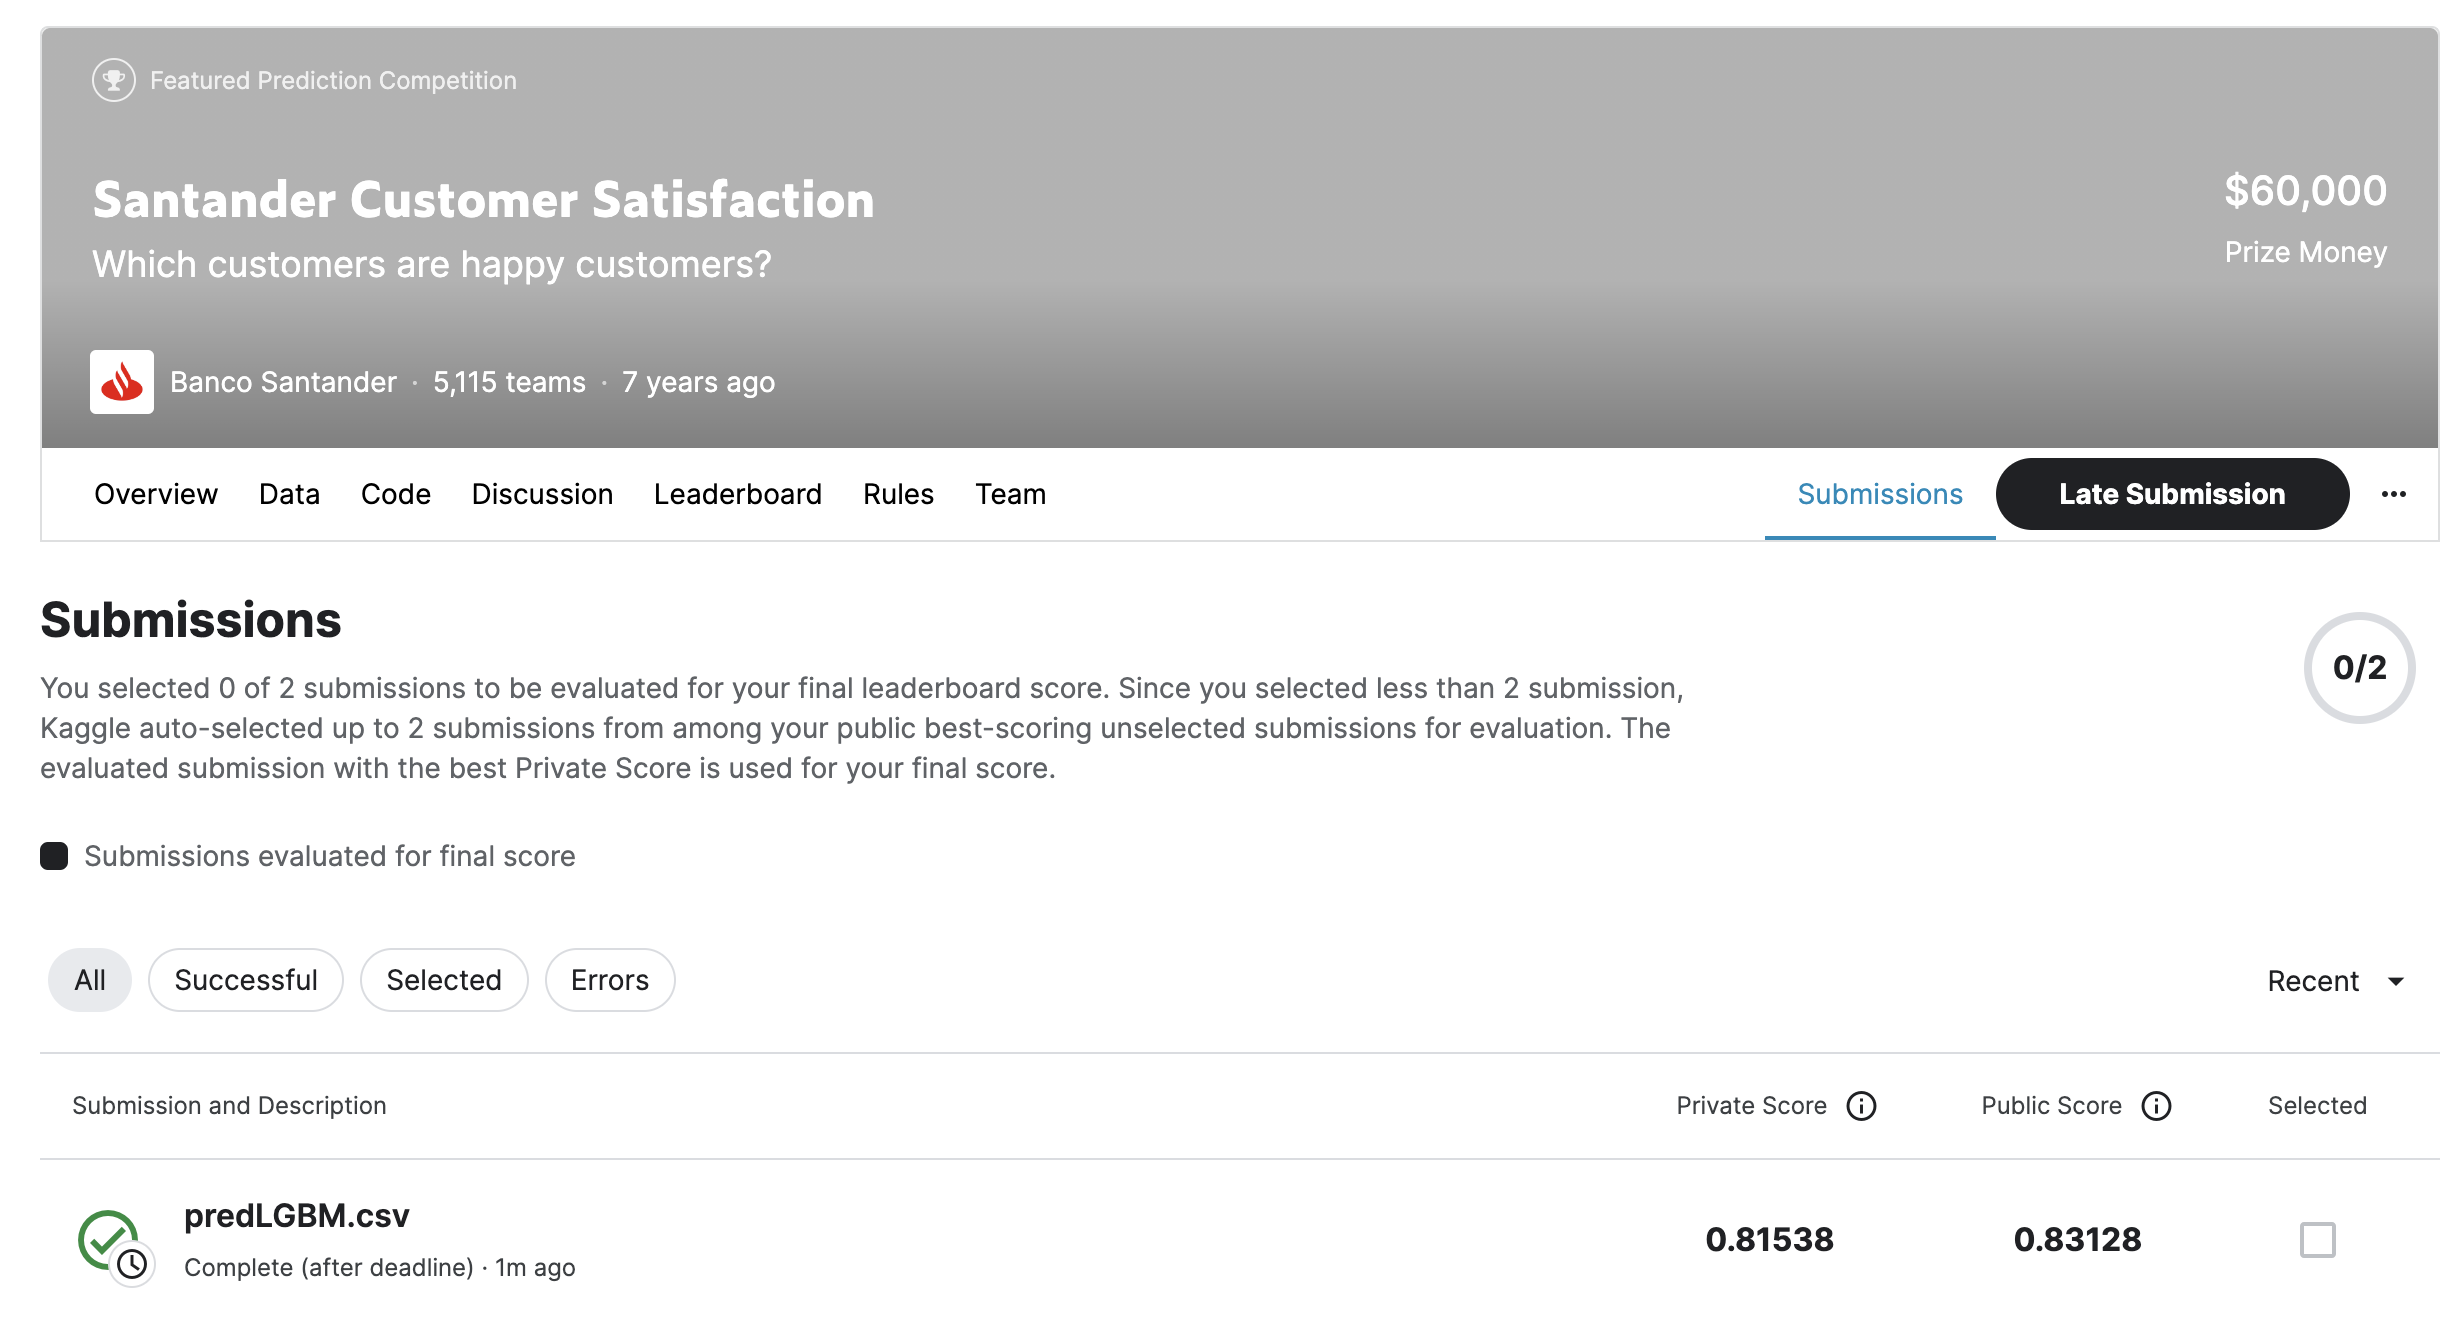

#### Feature Importance

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

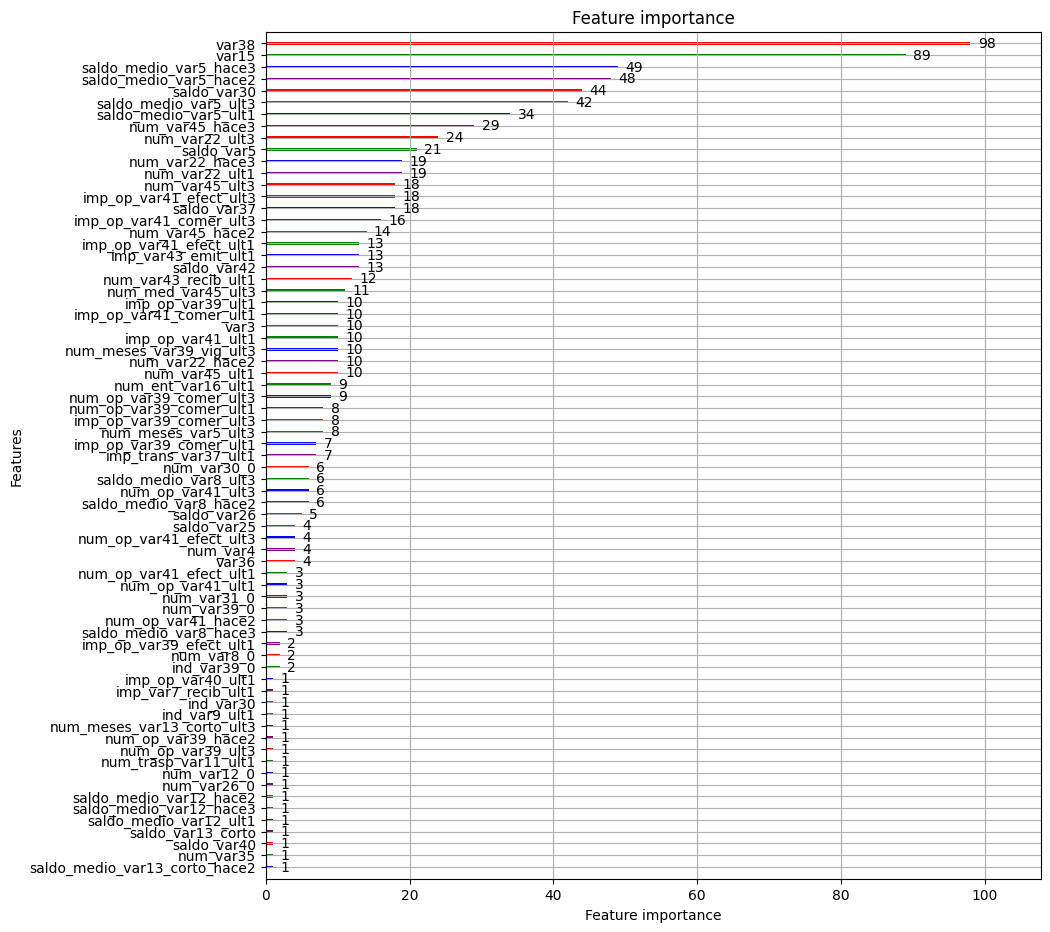

In [ ]:
import matplotlib.pyplot as plt
colors = ['blue', 'green', 'red', 'purple']
lgb.plot_importance(lgbm_clf, color=colors, figsize=(10, 11))